# 1  Numeric code preparation
use $ {}^1\!H $ bound with $ K^- $ to preper and check your code

## 1.2

### In this section:

calculate the ground state of $ {}^1\!H K^-$
use Numerov method to calculate $ u\left(r;E\right) $ for the energies $ E = (-1.1R_y, -1.05R_y, -1R_y, -0.95R_y, -0.9R_y) $ 

use $N=10^4,\; R=10a_B $

plot $ u\left(r\mid E\right) $

do not forget to normalize the function 
$$ |u|^2 = \int_{r}{u(r)^{2}dr} $$
$$ \tilde{u} = \frac{u}{|u|}

### code

#### calculation

In [1]:
from utils import const
from preset import H1, H2, He4, K
import numpy as np
from sys import float_info
from numerov_model import Numerov
from IPython.display import display, Math, display_latex, ProgressBar

p = H1 + K
v = lambda r: (- const.alpha * p.Z * const.hbarc / r).to('MeV')
m = Numerov(p, v, n=1)
N = int(1e4)
r = np.linspace(float_info.epsilon , 10, N)
E = np.array([-1.1, -1.05, -1, -0.95, -0.9])

display(Math(rf'\mu = {p.m:.3f}'), 
        Math(rf'R_y = {p.R_y:.3e}'),
        Math(rf'a_B = {p.a_B:.3f}'),
        Math(r'V(r) = -\frac{\alpha Z \hbar c}{r}'),
        Math(rf'N = {N:g}'),
        Math(rf'R = 10\cdot a_B = {10*p.a_B:g}'))
u = m.u(r, E)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

  0%|          | 0/9998 [00:00<?, ?it/s]

#### visualization

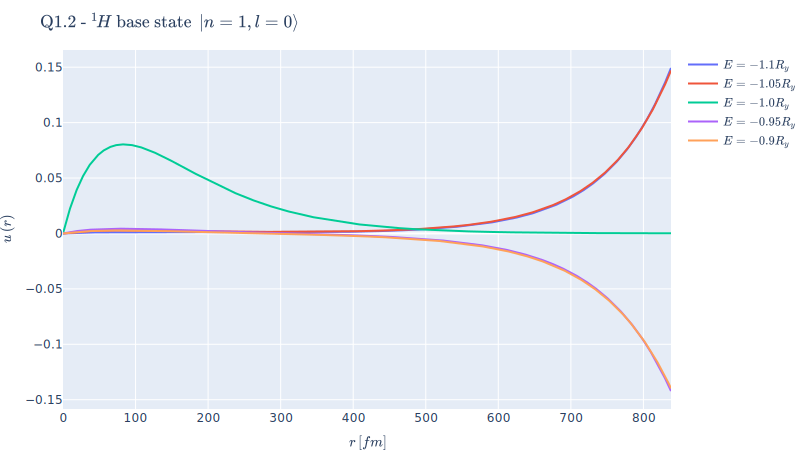

In [ ]:
# @title Q1.1 - $u(r)$ for $E=-1.1R_y, -1.05R_y, -1R_y, -0.95R_y, -0.9R_y$
from plotly import graph_objects as go
from utils import plotly_export

fig = go.Figure()
for i in range(len(E)):
    for j in range(1):
        fig.add_trace(go.Scatter(x=r*m.a_B, y=u[:,i, j], mode='lines', name=f'$ E={E[i]}R_y $'))
fig.update_layout(title=r'$ \text{Q1.2 - } {}^{1}\!H \text{ base state } \left|n=1,l=0\right> $')
fig.update_xaxes(title=r'$ r \left[fm\right] $') \
    .update_yaxes(title=r'$ u\left(r\right) $')
plotly_export(fig, '1.2')

#### results

we see that $u\left(R\mid -R_y\right)\cong0$ and for the other energies, it blows to hight and low values. 

from this we can understad that $E=-R_y$ is a bound energy and that the bound energies will be between energy that blows up and one that blows down.

## 1.4

### In this section:

use the _root finding_ method (Numerov.find_root) to find the ground state energy E of the system

use $ R=20a_B $ and do it for $ N = (10^2, 10^3, 10^4, 10^5) $

calcculate the _relative error_  $ \eta = \left| 1-\frac{E(N,R)}{-\frac{R_y}{n^2}} \right| = \left| 1+\frac{R_y \cdot E(N,R)}{n^2} \right| $ and plot $ \eta(N) $

### code

#### calculations

In [ ]:
from utils import const
from preset import H1, H2, He4, K
import numpy as np
from sys import float_info
from numerov_model import Numerov
from IPython.display import display, Math

p = H1 + K
v = lambda r: (- const.alpha * p.Z * const.hbarc / r).to('MeV')
m = Numerov(p, v, n=1)
Ns = np.array([int(1e2), int(1e3), int(1e4), int(1e5)])
etta = np.zeros((*Ns.shape, 1), dtype=float)
for i, N in enumerate(Ns):
    r = np.linspace(float_info.epsilon, 20, N)
    E = m.find_root(-1.05, -0.95, r).E
    print(E[0])
    etta[i] = m.relative_error(E)
etta = etta.squeeze()

#### visualisation

In [ ]:
from plotly import graph_objects as go
from utils import plotly_export

fig = go.Figure() \
    .add_trace(go.Scatter(x=Ns, y=etta, mode='lines+markers')) \
    .update_layout(title=r'$ \text{Q1.4 - } {}^{1}\!H \text{ base state } \left|n=1,l=0\right> $',
                   margin=dict(t=50, b=0, l=0, r=120), width=800, height=450) \
    .update_xaxes(type='log', title=r'$ N $') \
    .update_yaxes(type='log', title=r'$ \eta $')
fig.write_image(r"./plots/1.4.svg", width=800, height=450,format='svg',engine='kaleido')
plotly_export(fig, '1.4')
power_law = np.log(etta[-1]/etta[0])/np.log(Ns[-1]/Ns[0])
display(Math(rf'\eta \propto N^{{{power_law:.8f}}}'))

#### results

we can see that the error $\eta$ is power-law of the number of points $N$. 

when we extruct the power from the slope we get $$ \eta \propto N^{-1.97...} $$

## 1.5

### In this section:

calculate the energy levels of the system for the quantum states $ n=(1,2,3),\, l=(0,1,2) $

here use $ N=10^4 $ but chose $ R $ wisely for each state $ \left(n, l\right) $

ensure relative error $ \eta \sim 10^-6 $   
[here I used $ \eta < 3\cdot10^-6 $]

generate a table of the energy $ E$, the relative error $\eta$, and the radios $ r = \sqrt{\braket{r^2}}  $


$$ \braket{r^2} = \int_{0}^{R}{u^2(r)r^2dr}


### 1.5.1 find the arias of the bound energies and the effect of R on the result 

Here I tried to see how does $ u\left(E,R\right) $ is behave as function of E.

#### code

##### calculations

In [5]:
from utils import const, plotly_show_config, to_latex
from preset import H1, H2, He4, K
import numpy as np
from sys import float_info
from numerov_model import Numerov
from IPython.display import display, Math
from scipy.stats import norm

N = 20_000
p = H1 + K
v = lambda r: (- const.alpha * p.Z * const.hbarc / r).to('MeV')
n = 3
m = Numerov(p, v, n=n)
R = [i for i in range(20, 80, 10)]
e = np.linspace(0, -1.1, 2000)
# mean, std_dev = -1.0+1e-6, 1e-6
# e = np.sort(norm.rvs(loc=mean, scale=std_dev, size=1000))
u = [m.u(np.linspace(float_info.epsilon, r, N), e)[-1,:] for r in R]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

##### visualisation

In [10]:
from plotly import graph_objects as go
from utils import plotly_export

figs = [ go.Figure([go.Scatter(x=e, y=u[i][:,l], mode='lines+markers', name=f"R={r}") for i,r in enumerate(R)])\
    .update_layout(title=fr'$ \text{{Q1.5 help graph - }} {{}}^{{1}}\!H \text{{  }} l={l} $',
                     margin=dict(t=50, b=0, l=0, r=0), width=800, height=450) \
    .update_xaxes(title=r'$ E $') \
    .update_yaxes(title=r'$ u\left(r\right) $')
    for l in range(n)]

for l, fig in enumerate(figs):
    plotly_export(fig, f'1.5_{l=}')

In [ ]:
from utils import const, plotly_show_config, to_latex
from preset import H1, H2, He4, K
import numpy as np
from sys import float_info
from numerov_model import Numerov
from IPython.display import display, Math

N = 20_000
p = H1 + K
v = lambda r: (- const.alpha * p.Z * const.hbarc / r).to('MeV')
n = 3
m = Numerov(p, v, n=n)
r = np.linspace(float_info.epsilon, 20, N)
df2 = m.find_root(-5, -0.5, r)
eta = m.relative_error(df2.E, n)
print(f'n={n}, E={df2.E}, eta={eta}')

##### results

as we can see, as we rise the value of R we get more presice value foe the bound energy, but if R is too large, it become imposible for the computer to get the exact value.

we also can see that (at least for $l=0$) we are getting the results we expected, as $E=-R_y/n^2$ and we see kind of phase shift in $E=-1R_y, -0.5R_y, -0.11R_y$ 